In [1]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity (tf.compat.v1.logging.ERROR)
print('Using tensorflow version', tf.__version__)

Using tensorflow version 2.1.0


In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


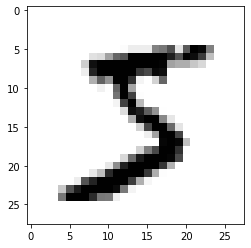

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

In [9]:
y_train[0]

5

In [10]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [14]:
#Encoding process
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [15]:
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


In [16]:
y_test_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [18]:
# Neural Network

import numpy as np
x_train_reshaped = np.reshape(x_train, (60000,784))
x_test_reshaped = np.reshape(x_test, (10000,784))
print('x_train_reshaped shape:', x_train_reshaped.shape)
print('x_test_reshaped shape', x_test_reshaped.shape)


x_train_reshaped shape: (60000, 784)
x_test_reshaped shape (10000, 784)


print(set(x_train_reshaped[5]))

In [21]:
# Data Normalization Method
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10 
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)


In [22]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [36]:
# Neural Network Model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
Model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
        ])

In [59]:


from keras import losses

Model.compile(loss=losses.mean_squared_error, 
              optimizer='sgd',
              metrics=['accuracy'])

Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Model Training

Model.fit(x_train_norm, y_train_encoded, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0188 - accuracy: 0.8824
Epoch 2/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0168 - accuracy: 0.8942
Epoch 3/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0154 - accuracy: 0.9023
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0144 - accuracy: 0.9086
Epoch 5/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0137 - accuracy: 0.9140


In [64]:
loss, accuracy = Model.evaluate(x_test_norm, 
                               y_test_encoded)
print('tested set accuracy:', accuracy*100)

10000/10000 [==============================] - 3s 279us/sample - loss: 0.0128 - accuracy: 0.9186
tested set accuracy: 91.86000227928162


In [65]:
pred = Model.predict(x_test_norm)
print('Shape of Pred:', pred.shape)


Shape of Pred: (10000, 10)


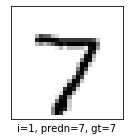

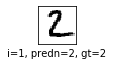

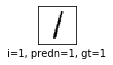

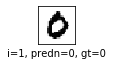

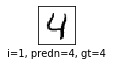

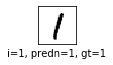

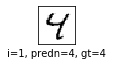

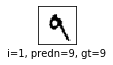

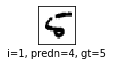

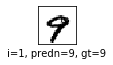

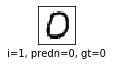

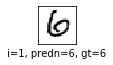

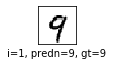

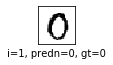

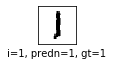

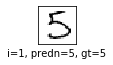

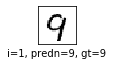

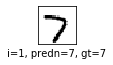

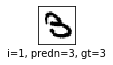

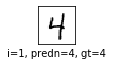

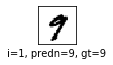

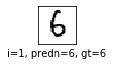

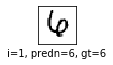

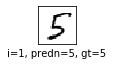

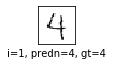

In [79]:
#Prediction Model Figure

plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    predn = np.argmax(pred[start_index+i])

    gt = y_test[start_index+i]
    col ='g'

    if predn!= gt:
     col = 'r'
    plt.xlabel('i={}, predn={}, gt={}' . format(start_index+1, predn, gt))
    plt.imshow(x_test[start_index+i], cmap='binary')
    plt.show()